In [1]:
from NMF import *
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [2]:
K = 4
F = 1025
N = 500
W = np.zeros((F, K))
H = np.zeros((K, N))

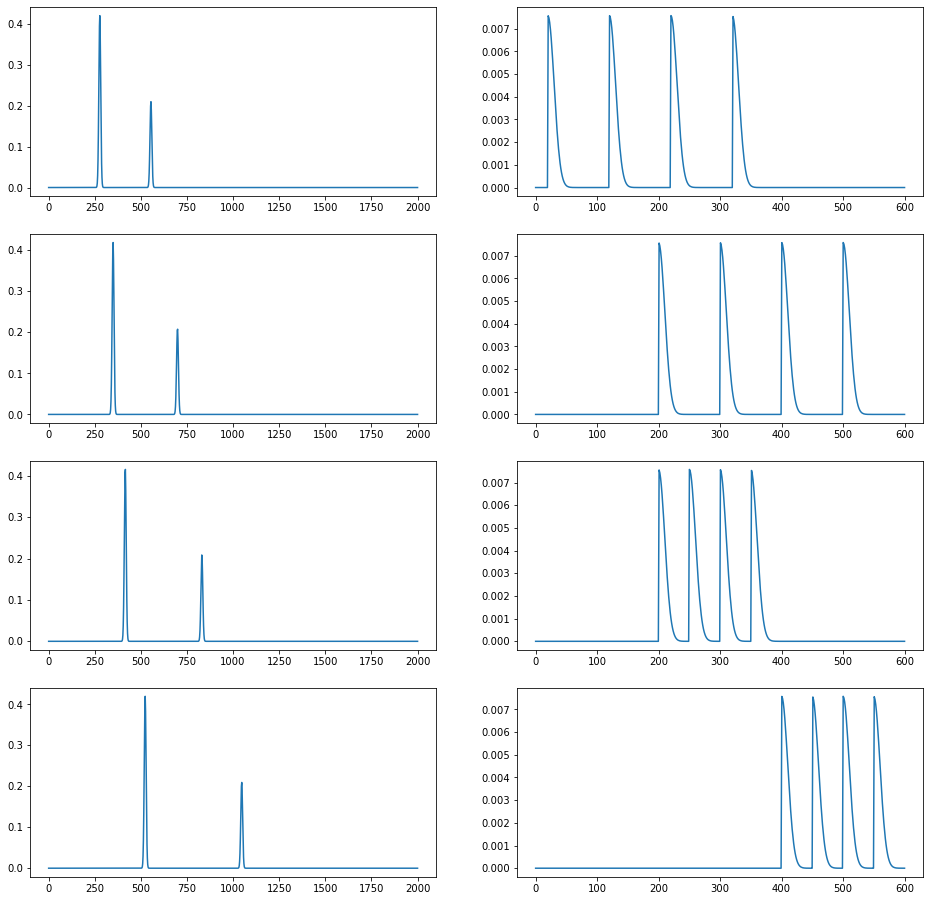

In [3]:
pitches = np.array([61, 65, 68, 72])
times_set = np.array([[20, 120, 220, 320],[200, 300, 400, 500],[200, 250, 300, 350],[400, 450, 500, 550]])
freq_set = 440 * np.power(2, (pitches - 69) / 12)

frequencies = np.linspace(0, 2000, F)
times = np.linspace(0, 600, N)

for i in range(4):
    W[:, i] = stats.norm.pdf(frequencies, loc=freq_set[i], scale=5) + 0.5 * stats.norm.pdf(frequencies, loc=2 * freq_set[i], scale=5)
    for j in range(4):
        H[i, :] += (times > times_set[i, j]) * stats.norm.pdf(times, loc=times_set[i, j], scale=10)
for k in range(K):
    norm_factor = np.linalg.norm(W[:, k])
    W[:, k] = W[:, k] / norm_factor
    H[k, :] = H[k, :] * norm_factor

fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W[:, i])
    axes[i, 1].plot(times, H[i, :])
plt.show()

In [4]:
V = W @ H
spec = Spectrogram(V, frequencies)

**KL_NMF**

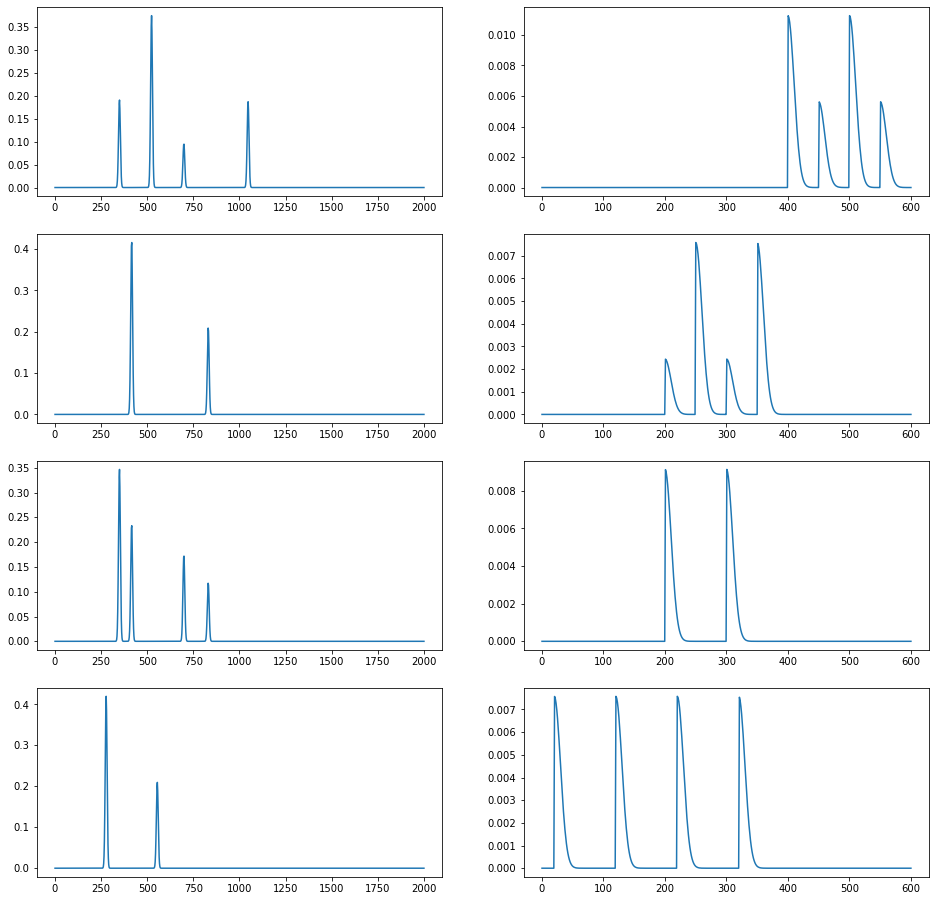

[53. 68. 37. 61.]


In [5]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_KL(K, 5000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

**EUC_NMF**

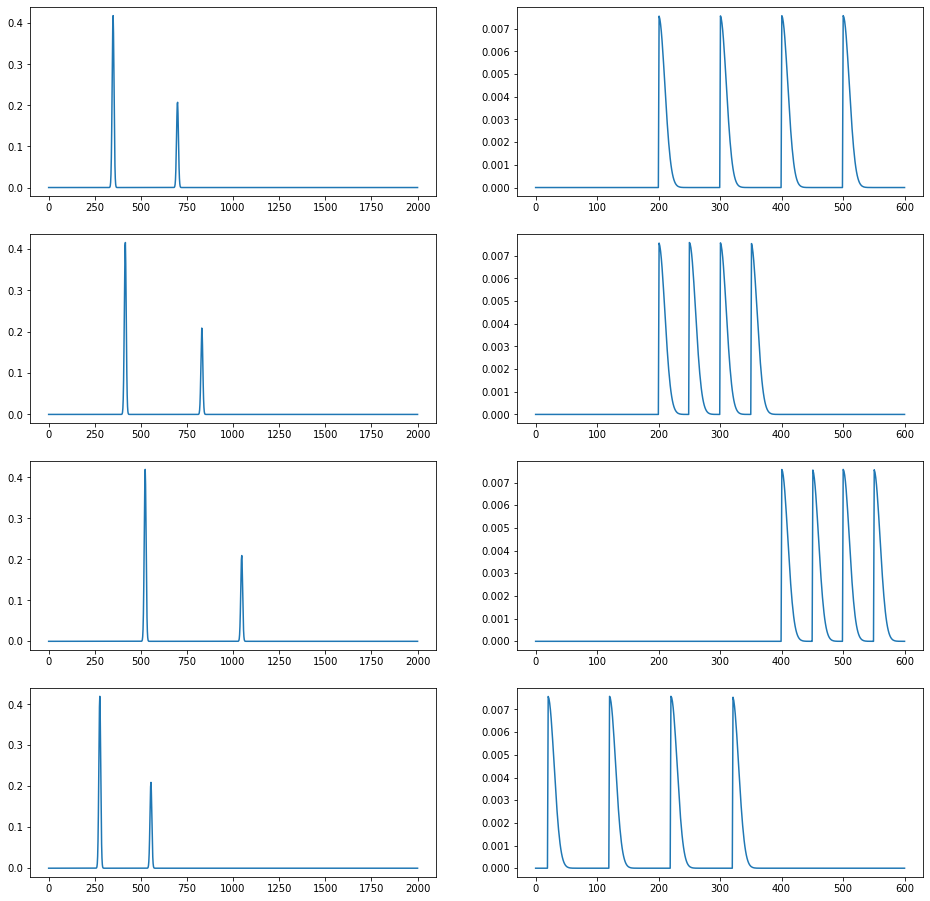

[65. 68. 72. 61.]


In [6]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_EUC(K, 5000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

**IS_MU_NMF**

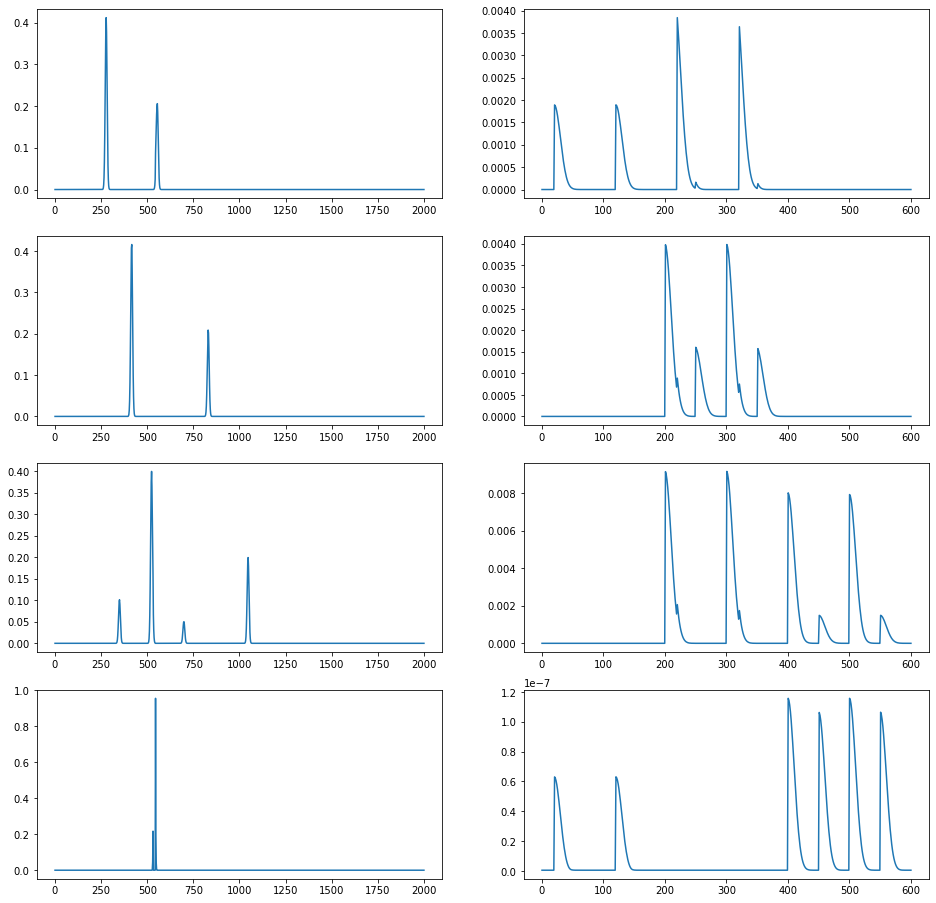

[61.  68.  53.  72.6]


In [7]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_MU_IS(K, 5000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

**EM_IS_NMF**

/home/maria/MachineLearning/NMF.py:395: RuntimeWarning: invalid value encountered in log
  return x / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1


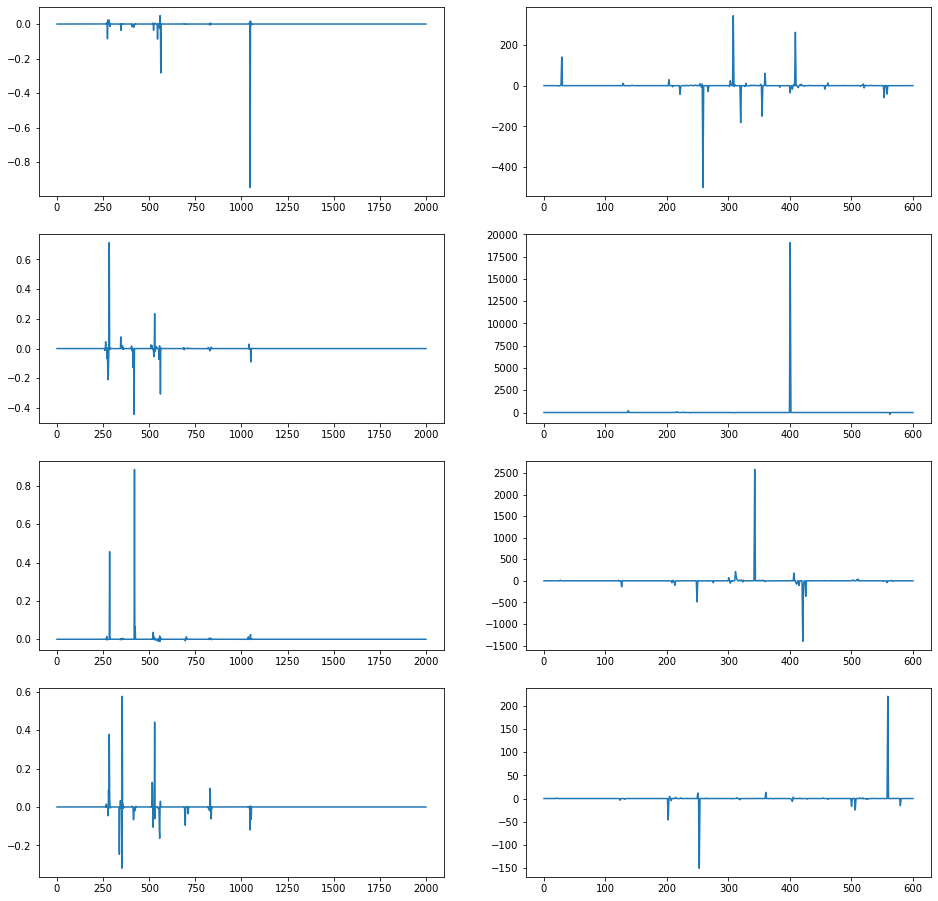

[ 27.6  49.   49.2 108.4]


In [8]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_EM_IS(K, 5000)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

**R_EM_IS_NMF**

/home/maria/MachineLearning/NMF.py:395: RuntimeWarning: invalid value encountered in log
  return x / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1
/home/maria/MachineLearning/NMF.py:338: RuntimeWarning: invalid value encountered in sqrt
  new_h_k = (np.sqrt((p_1 ** 2) - (4 * p_2 * p_0)) - p_1) / (2 * p_2)


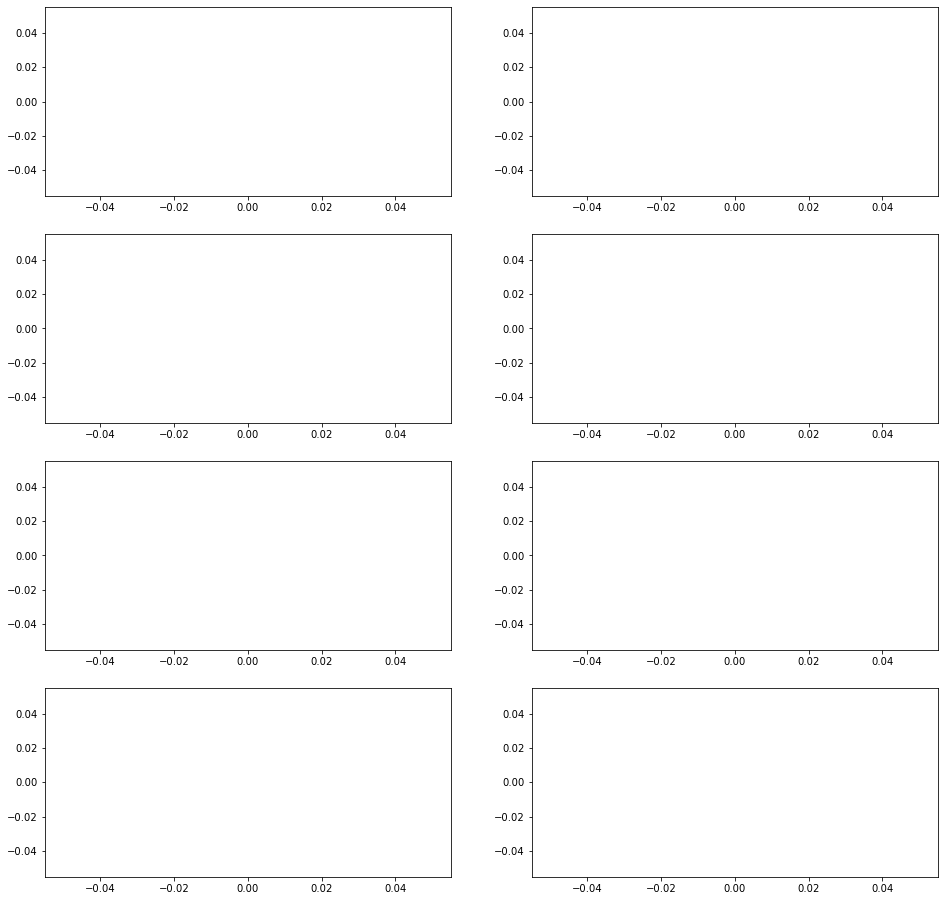

[20.6 20.6 20.6 20.6]


In [11]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_R_EM_IS(K, 5000, alpha=10)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])